<a href="https://colab.research.google.com/github/kanika26187/ONLINEPAYMENT-FRAUD-DETECTION/blob/main/Onlinepayment_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing** **Libraries** **and** **Datasets**




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv('onlinefraud.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132654 entries, 0 to 1132653
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1132654 non-null  int64  
 1   type            1132654 non-null  object 
 2   amount          1132654 non-null  float64
 3   nameOrig        1132654 non-null  object 
 4   oldbalanceOrg   1132654 non-null  float64
 5   newbalanceOrig  1132654 non-null  float64
 6   nameDest        1132654 non-null  object 
 7   oldbalanceDest  1132654 non-null  float64
 8   newbalanceDest  1132653 non-null  float64
 9   isFraud         1132653 non-null  float64
 10  isFlaggedFraud  1132653 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 95.1+ MB


In [ ]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.132654e+06,1.132654e+06,1.132654e+06,1.132654e+06,1.132654e+06,1.132653e+06,1.132653e+06,1132653.0
mean,3.417170e+01,1.605159e+05,8.702118e+05,8.899478e+05,9.782451e+05,1.113175e+06,1.319027e-03,0.0
std,2.972017e+01,2.739818e+05,2.953309e+06,2.989757e+06,2.299080e+06,2.417609e+06,3.629447e-02,0.0
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.500000e+01,1.213042e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,2.300000e+01,7.583754e+04,1.587700e+04,0.000000e+00,1.237954e+05,2.153020e+05,0.000000e+00,0.0
75%,4.100000e+01,2.145808e+05,1.335449e+05,1.713766e+05,9.165243e+05,1.147969e+06,0.000000e+00,0.0
max,1.310000e+02,1.000000e+07,3.893942e+07,3.894623e+07,4.216916e+07,4.220740e+07,1.000000e+00,0.0


# **Data** **Visualization**


In [ ]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

Categorical variables: 3
Integer variables: 1
Float variables: 7


<Axes: xlabel='type', ylabel='count'>

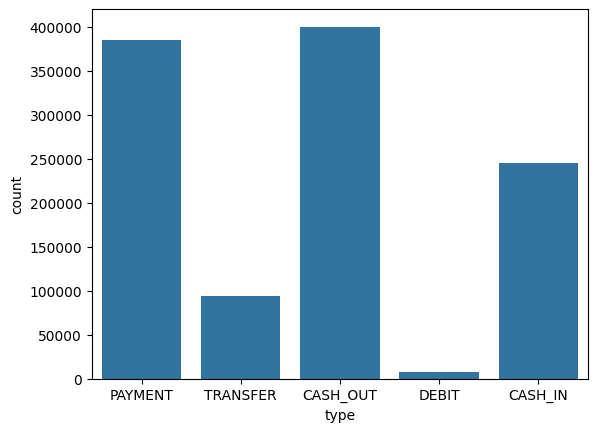

In [ ]:
sns.countplot(x='type', data=data)

<Axes: xlabel='type', ylabel='amount'>

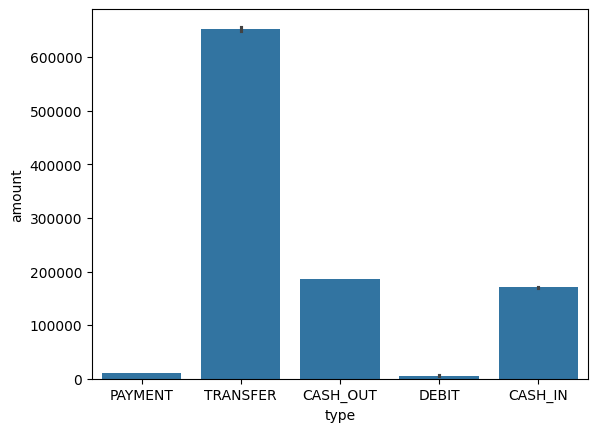

In [ ]:
sns.barplot(x='type', y='amount', data=data)

In [ ]:
data['isFraud'].value_counts()

,count
isFraud,
0.0,1131159
1.0,1494


<Axes: xlabel='step', ylabel='Count'>

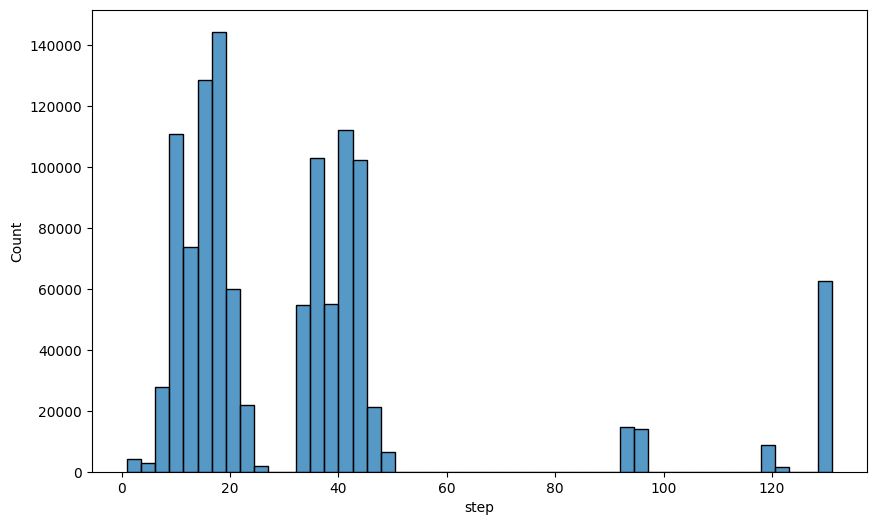

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['step'], bins=50)

<Axes: >

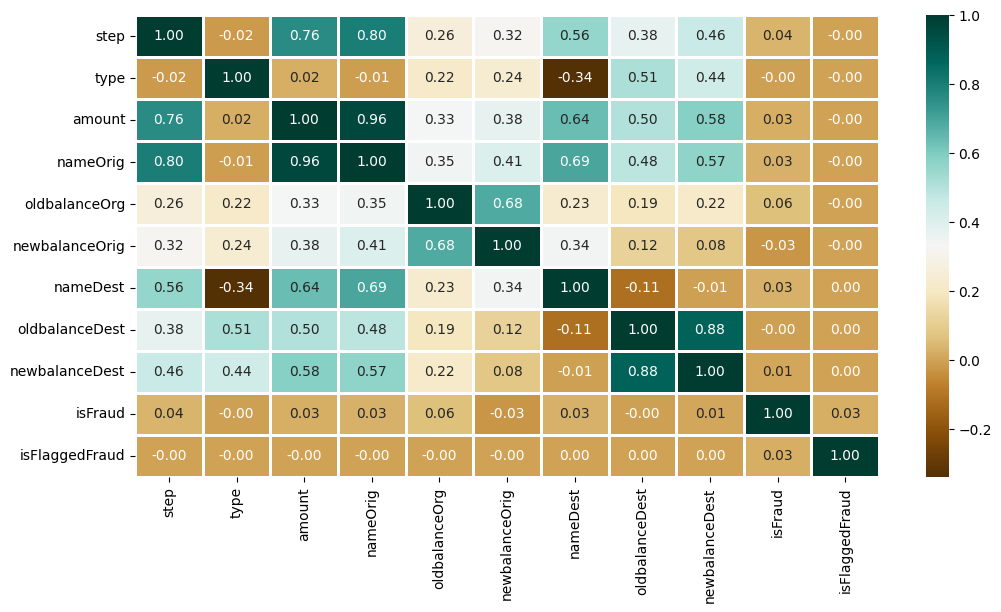

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.apply(lambda x: pd.factorize(x)[0]).corr(),
			cmap='BrBG',
			fmt='.2f',
			linewidths=2,
			annot=True)

# **Data** **Preprocessing**

In [ ]:
type_new = pd.get_dummies(data['type'], drop_first=True)
data_new = pd.concat([data, type_new], axis=1)
data_new.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0,False,False,True,False
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0,False,False,True,False
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0,False,False,False,True
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0,True,False,False,False
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0,False,False,True,False


In [ ]:
X = data_new.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
y = data_new['isFraud']

In [ ]:
X.shape, y.shape


((1132654, 11), (1132654,))

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# **Model Training**

As the prediction is a classification problem so the models we will be using are :

 * LogisticRegression :  It predicts that the probability of a given data belongs to the particular category or not.

 * XGBClassifier : It refers to Gradient Boosted decision trees. In this algorithm, decision trees are created in sequential form and weights are assigned to all the independent variables which are then fed into the decision tree which predicts results.

* SVC : SVC is used to find a hyperplane in an N-dimensional space that distinctly classifies the data points. Then it gives the output according the most nearby element.

* RandomForestClassifier : Random forest classifier creates a set of decision trees from a randomly selected subset of the training set. Then, it collects the votes from different decision trees to decide the final prediction.

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score as ras
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# Check for missing values
print(data_new.isnull().sum())

# Fill missing values in relevant columns with the mean
data_new['newbalanceDest'].fillna(data_new['newbalanceDest'].mean(), inplace=True)
data_new['isFlaggedFraud'].fillna(data_new['isFlaggedFraud'].mean(), inplace=True)

# Drop rows with missing values in 'isFraud' column
data_new.dropna(subset=['isFraud'], inplace=True)


# Re-create X and y after handling missing values
X = data_new.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
y = data_new['isFraud']

# Split the data again after handling missing values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
CASH_OUT          0
DEBIT             0
PAYMENT           0
TRANSFER          0
dtype: int64


/tmp/ipython-input-1394762054.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_new['newbalanceDest'].fillna(data_new['newbalanceDest'].mean(), inplace=True)
/tmp/ipython-input-1394762054.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].me

In [ ]:
models = [LogisticRegression(max_iter=300),
          XGBClassifier(n_estimators=500, learning_rate=0.05, eval_metric='logloss'),
          RandomForestClassifier(n_estimators=7,
                                 criterion='entropy',
                                 random_state=7)]

for i in range(len(models)):
    # For XGBoost, we will use early stopping to find the optimal number of boosting rounds
    if isinstance(models[i], XGBClassifier):
        models[i].fit(X_train, y_train)
    else:
        models[i].fit(X_train, y_train)

    print(f'{models[i]} : ')

    train_preds = models[i].predict_proba(X_train)[:, 1]
    print('Training AUC : ', ras(y_train, train_preds))

    y_preds = models[i].predict_proba(X_test)[:, 1]
    print('Validation AUC : ', ras(y_test, y_preds))
    print()

LogisticRegression(max_iter=300) : 
Training AUC :  0.9838654799650776
Validation AUC :  0.9842312730863109

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, ...) : 
Training AUC :  0.9999798713153984
Validation AUC :  0.9981210770248897

RandomForestClassifier(criterion='en

# **Model Evaluation**

The best-performed model is XGBClassifier. Let's plot the Confusion Matrix for the same.

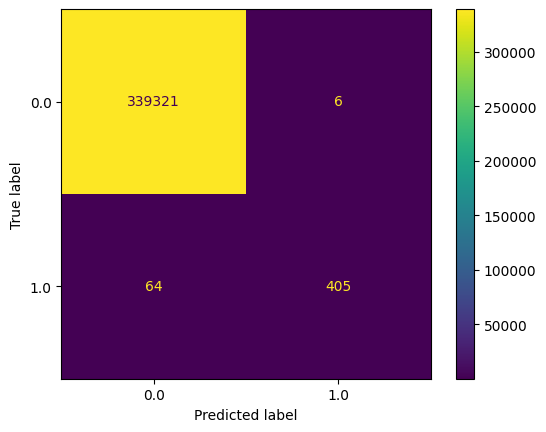

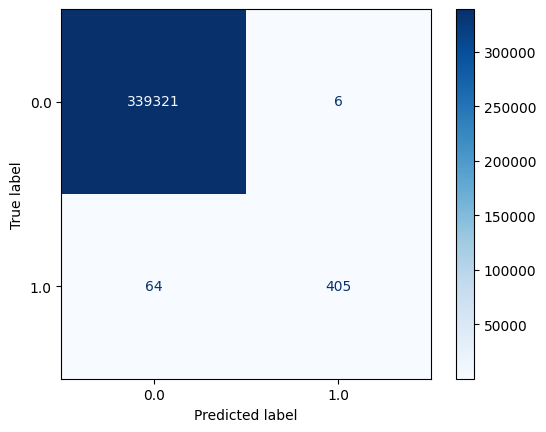

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = ConfusionMatrixDisplay.from_estimator(models[1], X_test, y_test)

cm.plot(cmap='Blues')

plt.show()

# **Deploy** **Model**

In [ ]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(models[1], f)